<a href="https://colab.research.google.com/github/Kyeong-Ah/test333/blob/kka/%ED%98%BC%EC%9D%B8%EA%B1%B4%EC%88%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import warnings
from IPython.core.pylabtools import figsize
warnings.filterwarnings("ignore")
plt.style.use('ggplot')

In [3]:
# # Arima
# # 데이터 불러오기
data = pd.read_csv('/content/drive/MyDrive/서울시 구별 혼인건수.csv', encoding='utf-8-sig')
marryJR = pd.DataFrame()
yymm = []
yymm = pd.date_range("2011-01", "2022-01", freq="M")
marryJR['ymd'] = yymm
marryJR['marry'] = data['종로구']
timeSeries = marryJR.loc[:, ['ymd', 'marry']]
# timeSeries.index = timeSeries.ymd
timeSeries.drop('ymd', axis=1)
timeSeries = timeSeries.set_index('ymd')
print(timeSeries.head(5))
ts = timeSeries
print(ts)
print(ts.info())


            marry
ymd              
2011-01-31   82.0
2011-02-28   93.0
2011-03-31   88.0
2011-04-30   75.0
2011-05-31  105.0
            marry
ymd              
2011-01-31   82.0
2011-02-28   93.0
2011-03-31   88.0
2011-04-30   75.0
2011-05-31  105.0
...           ...
2021-08-31   40.0
2021-09-30   38.0
2021-10-31   44.0
2021-11-30   29.0
2021-12-31   40.0

[132 rows x 1 columns]
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 132 entries, 2011-01-31 to 2021-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   marry   132 non-null    float64
dtypes: float64(1)
memory usage: 2.1 KB
None


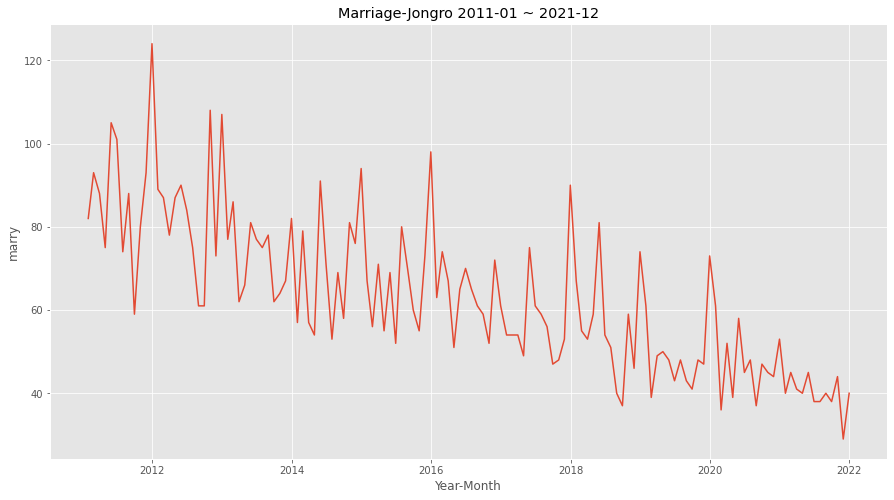

In [4]:
# # 2011-01부터 2021-12 까지 종로구 혼인건수 그래프
plt.figure(figsize=(15, 8))
plt.plot(ts)
plt.title("Marriage-Jongro 2011-01 ~ 2021-12")
plt.xlabel("Year-Month")
plt.ylabel("marry")
plt.show()


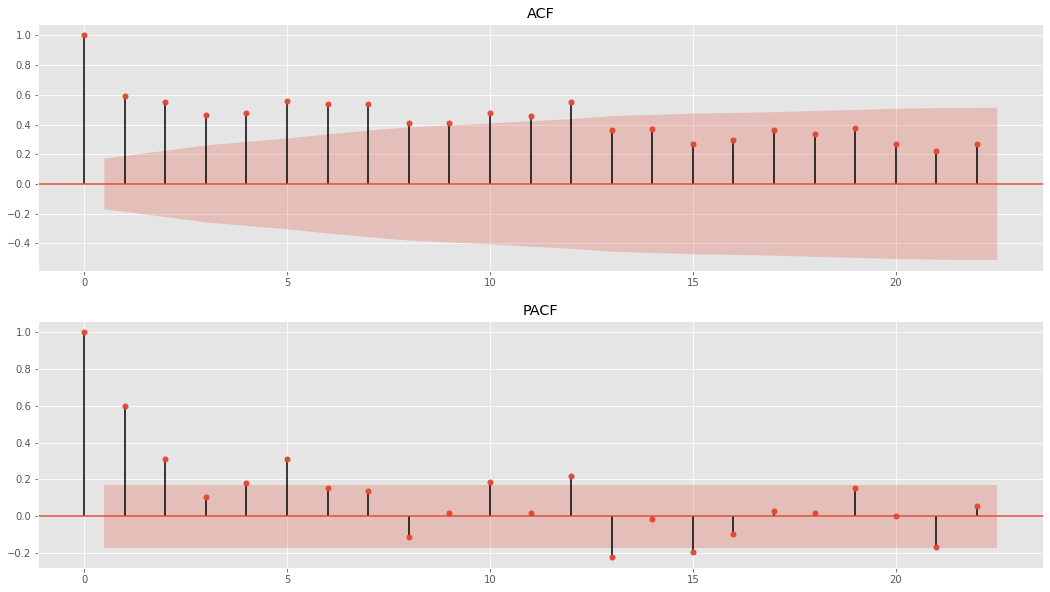

In [5]:
# # ACF, PACF 그래프
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig = plt.figure(figsize=(18, 10))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)
fig = plot_acf(ts, ax = ax1)
ax1.set_title("ACF")
fig = plot_pacf(ts, ax = ax2)
ax2.set_title("PACF")
plt.show()


<Figure size 432x288 with 0 Axes>

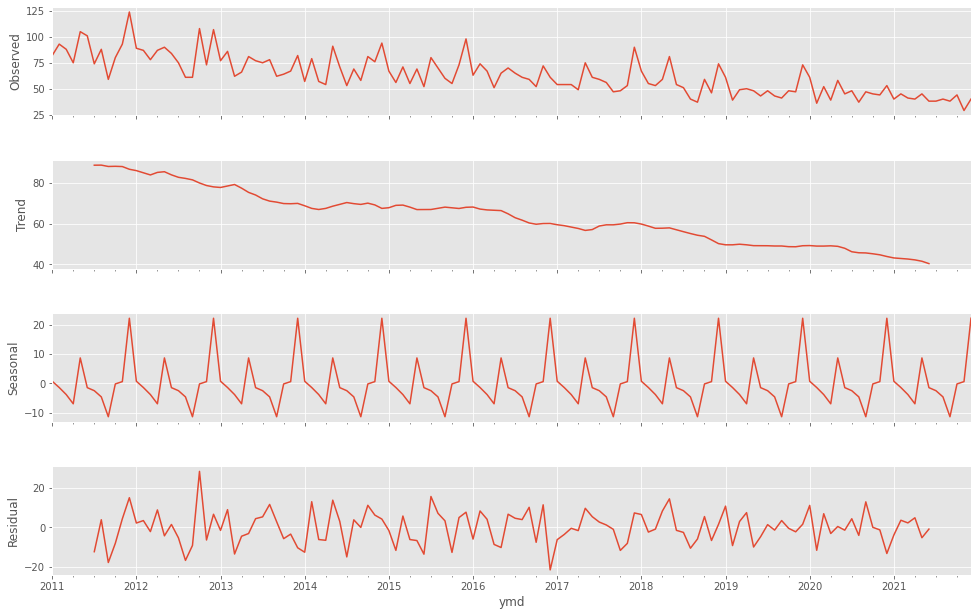

In [6]:
# # seasonal_decompose()
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(ts['marry'], model='additive')
fig = plt.figure()
fig = result.plot()
fig.set_size_inches(15, 10)
plt.show()


In [7]:
# # 정상성 확인 : ADF(Augmented Dickey-Fuller test)
# # 귀무가설 : 자료가 정상성을 만족하지 않는다. / 대립가설 : 자료가 정상성을 만족한다.

''' 콜랩에서 adfuller가 임포트가 안 되서... 이건 보류. '''

# from statsmodels.tsa.stattools import adfuller
# result1 = adfuller(ts)
# print('ADF Statistic : %f'% result1[0])
# print('p-value : %f'% result1[1])
# print('Critical Values : ')
# for key, value in result1[4].items():
#     print('\t%s: %.3f'%(key, value))
# ''' ADF Statistic : 3.745713
#     p-value : 1.000000
#     Critical Values : 
#         1%: -3.487
#         5%: -2.886
#         10%: -2.580            '''

# # 1차 차분
# ts_diff = ts - ts.shift()
# print(ts_diff)

# # 1차 차분 데이터로 다시 정상성 검사
# from statsmodels.tsa.stattools import adfuller
# result2 = adfuller(ts_diff[1:])
# print(result2)
# print('\n1차 차분 후')
# print('ADF Statistic : %f'% result2[0])
# print('p-value : %f'% resul2t[1])
# print('Critical Values : ')
# for key, value in result2[4].items():
#     print('\t%s: %.3f'%(key, value))

' 콜랩에서 adfuller가 임포트가 안 되서... 이건 보류. '

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


           ymd  marry
120 2021-01-31   40.0
121 2021-02-28   45.0
122 2021-03-31   41.0
123 2021-04-30   40.0
124 2021-05-31   45.0
125 2021-06-30   38.0
126 2021-07-31   38.0
127 2021-08-31   40.0
128 2021-09-30   38.0
129 2021-10-31   44.0
130 2021-11-30   29.0
131 2021-12-31   40.0
2021-01-31    42.401505
2021-02-28    42.406789
2021-03-31    40.520313
2021-04-30    41.206676
2021-05-31    41.946724
2021-06-30    41.350860
2021-07-31    41.668262
2021-08-31    40.491118
2021-09-30    40.566848
2021-10-31    41.147758
2021-11-30    40.095471
2021-12-31    39.780537
Freq: M, dtype: float64


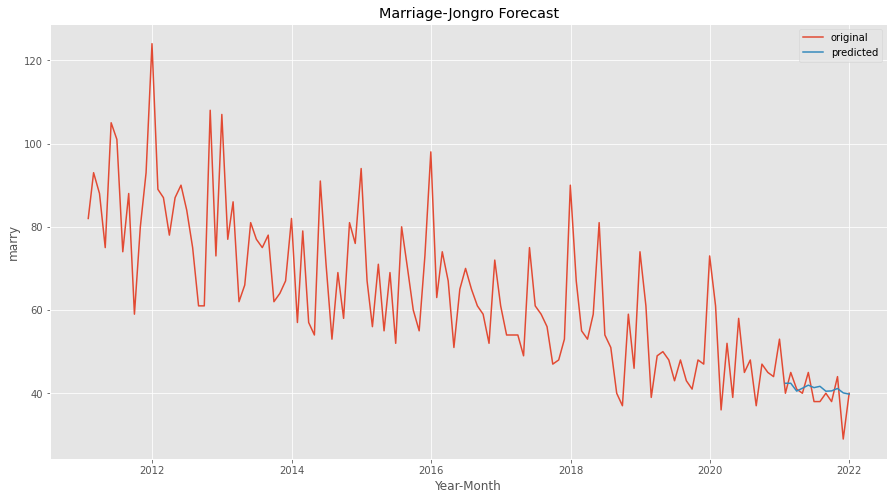

                             ARIMA Model Results                              
Dep. Variable:                D.marry   No. Observations:                  131
Model:                 ARIMA(4, 1, 1)   Log Likelihood                -503.898
Method:                       css-mle   S.D. of innovations             11.080
Date:                Wed, 08 Jun 2022   AIC                           1021.796
Time:                        01:07:23   BIC                           1041.923
Sample:                    02-28-2011   HQIC                          1029.975
                         - 12-31-2021                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.3701      0.018    -20.848      0.000      -0.405      -0.335
ar.L1.D.marry    -0.0316      0.086     -0.367      0.714      -0.200       0.137
ar.L2.D.marry    -0.0440      0.084     

In [8]:
# # ARIMA 모델 만들기
from statsmodels.tsa.arima_model import ARIMA
# # fit model
model = ARIMA(ts, order=(4 , 1, 1))
model_fit = model.fit()
# # predict
start_index = marryJR['ymd'][120] # 2021-01-31 00:00:00
end_index = marryJR['ymd'][131]   # 2021-12-31 00:00:00
forecast = model_fit.predict(start=start_index, end=end_index, typ='levels')
# # 확인
print(marryJR[120:])
print(forecast)

# 시각화
plt.figure(figsize=(15, 8))
plt.plot(marryJR.ymd, marryJR['marry'], label="original")
plt.plot(forecast, label='predicted')
plt.title("Marriage-Jongro Forecast")
plt.xlabel("Year-Month")
plt.ylabel("marry")
plt.legend()
plt.show()

print(model_fit.summary())


In [10]:
# # 성능 확인
from sklearn import metrics

def score_check(y_true, y_pred):
    r2 = round(metrics.r2_score(y_true, y_pred) * 100, 3)
    #     mae = round(metrices.mean_absolute_error(y_true, y_pred),3)
    corr = round(np.corrcoef(y_true, y_pred)[0, 1], 3)
    mape = round(
        metrics.mean_absolute_percentage_error(y_true, y_pred) * 100, 3)
    rmse = round(metrics.mean_squared_error(y_true, y_pred, squared=False), 3)
    
    df = pd.DataFrame({
        'R2':r2,
        'Corr':corr,
        'RMSE':rmse,
        'MAPE':mape
    },
                    index=[0])
    return df

score_check(np.array(marryJR[marryJR.ymd>=start_index]['marry']), np.array(forecast))


,R2,Corr,RMSE,MAPE
0,6.691,0.516,3.94,7.874


In [11]:
fore = model_fit.forecast(steps=12)
print('예측', fore)
'''   ※ stderr
       array([38.58635927,
              39.85559518,
              39.45437184,
              37.34606242,
              36.8513144,
              36.29541801,
              36.31815503,
              36.260246,
              35.92403957,
              35.48512105,
              34.98279921,
              34.5606616]),
       ※ upper bound
       array([11.08024433, 11.08578372, 11.09598705, 11.34577893, 11.46845959,
       11.47288094, 11.49158048, 11.51422403, 11.51531003, 11.51763515,
       11.52067835, 11.52147725]),
       ※ lower bound
       array([[16.86947944, 60.30323911],
       [18.12785835, 61.58333202],
       [17.70663685, 61.20210684],
       [15.10874435, 59.58338049],
       [14.37354664, 59.32908215],
       [13.80898457, 58.78185144],
       [13.79507117, 58.84123889],
       [13.69278159, 58.82771041],
       [13.35444665, 58.49363249],
       [12.91097097, 58.05927112],
       [12.40268458, 57.56291385],
       [11.97898114, 57.14234206]])
'''


예측 (array([38.58635927, 39.85559518, 39.45437184, 37.34606242, 36.8513144 ,
       36.29541801, 36.31815503, 36.260246  , 35.92403957, 35.48512105,
       34.98279921, 34.5606616 ]), array([11.08024433, 11.08578372, 11.09598705, 11.34577893, 11.46845959,
       11.47288094, 11.49158048, 11.51422403, 11.51531003, 11.51763515,
       11.52067835, 11.52147725]), array([[16.86947944, 60.30323911],
       [18.12785835, 61.58333202],
       [17.70663685, 61.20210684],
       [15.10874435, 59.58338049],
       [14.37354664, 59.32908215],
       [13.80898457, 58.78185144],
       [13.79507117, 58.84123889],
       [13.69278159, 58.82771041],
       [13.35444665, 58.49363249],
       [12.91097097, 58.05927112],
       [12.40268458, 57.56291385],
       [11.97898114, 57.14234206]]))


'   ※ stderr\n      (array([3633169.1173565,\n              3647923.56079389,\n              3662678.00423128,\n              3677432.44766867,\n              3692186.89110606,\n              3706941.33454346,\n              3721695.77798085,\n              3736450.22141824,\n              3751204.66485563,\n              3765959.10829302,\n              3780713.55173041,\n              3795467.9951678]),\n       ※ upper bound\n       array([ 9215.68280801,\n              16442.09993016,\n              21348.45405666,\n              25321.34141598,\n              28750.37689493,\n              31811.91619655,\n              34603.63929692,\n              37186.3643435,\n              39601.00419917,\n              41876.64473282,\n              44034.84091687,\n              46092.09319471]),\n       ※ lower bound\n       array([[3615106.71095985, 3651231.52375314],\n              [3615697.63710056, 3680149.48448722],\n              [3620835.80315463, 3704520.20530793],\n              